<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.1 Multilayer perceptrons

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

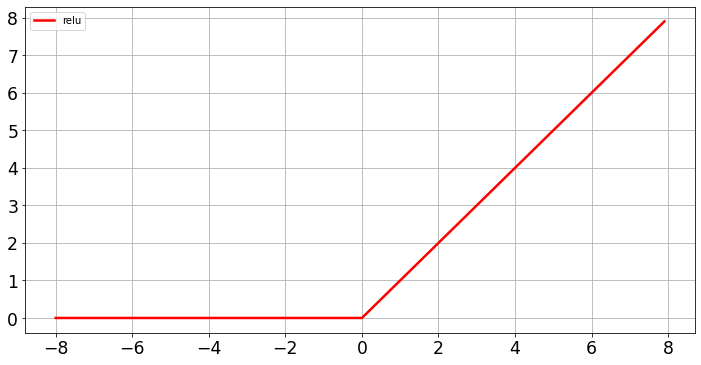

In [5]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

plt.plot(x.detach(), y.detach(), 'r', label = 'relu')
plt.grid()
plt.legend();

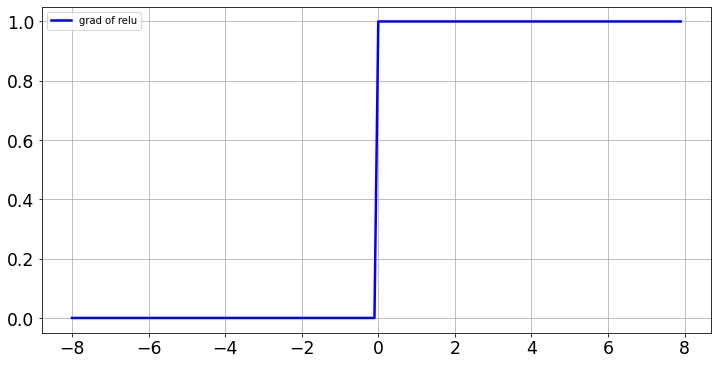

In [6]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad, label = 'grad of relu', color='b')
plt.legend()
plt.grid();

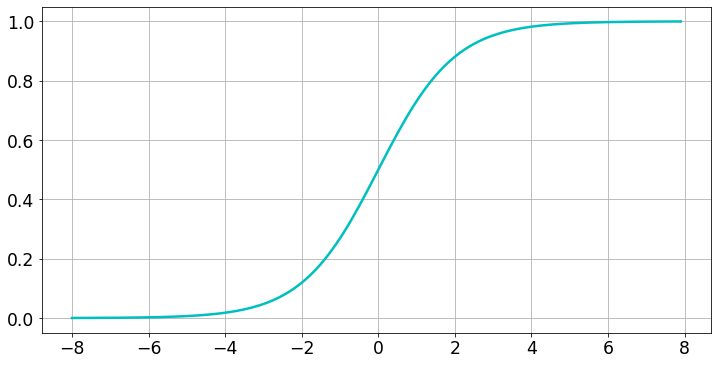

In [7]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)

plt.plot(x.detach(), y.detach(), 'c')
plt.grid();

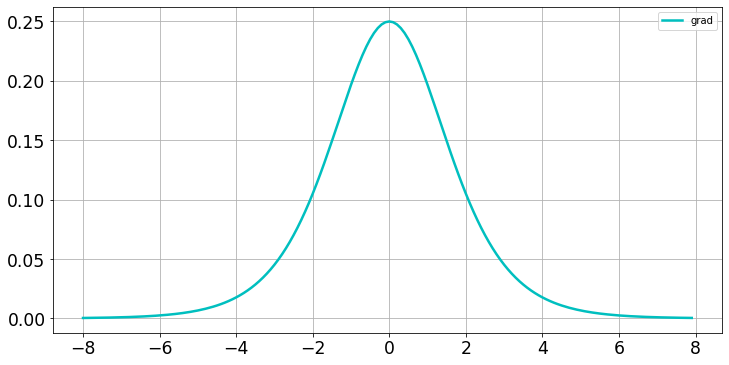

In [8]:
# x.grad.data.zero_() # for clearing previous gradients
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad, 'c', label = 'grad')
plt.legend()
plt.grid();

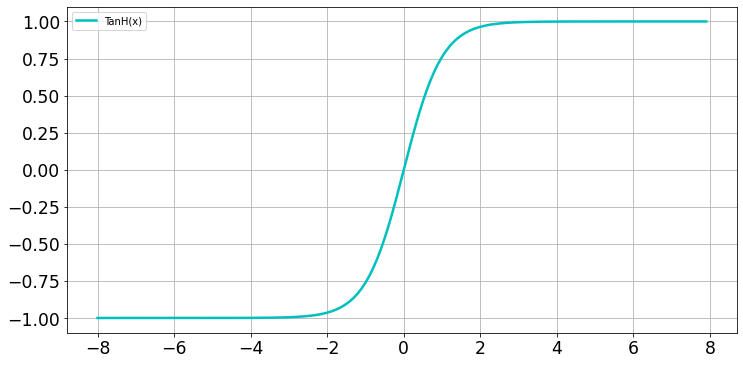

In [9]:
y = torch.tanh(x)
plt.plot(x.detach(), y.detach(), 'c', label='TanH(x)')
plt.legend()
plt.grid();

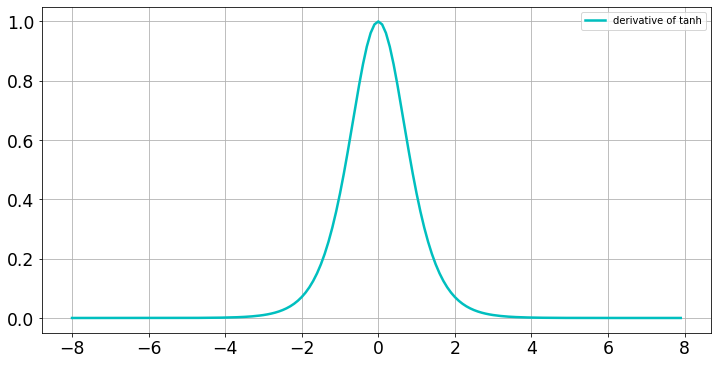

In [10]:
x.grad.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad, 'c', label = 'derivative of tanh')
plt.legend()
plt.grid();

## Ex 5.1:

### Q1:

In [4]:
import torch.nn as nn

In [5]:
from torch.utils.data import TensorDataset

In [60]:
TensorDataset??

In [13]:
def give_dataset(n_samples, w, b, noise=0.01):

  X = torch.randn(n_samples, w.shape[0])
  noise = torch.normal(0, 0.01, (n_samples, 1)) * noise
  y = torch.mm(X, w.reshape(-1, 1)) + b + noise
  dataset = TensorDataset(X, y)
  return dataset

In [14]:
class NeuralNet1(nn.Module):

  # contains just one linear layer

  def __init__(self, input_size, output_size):
    super().__init__()
    self.input_size = input_size
    self.output_size = output_size
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, X):
    out = self.linear(X)
    return out

  def loss(self, y, y_hat):
    criterion = nn.MSELoss()
    return criterion(y, y_hat)

In [15]:
class NeuralNet2(nn.Module):

  # contains 3 linear layers
  def __init__(self, input_size, output_size):
    super().__init__()
    self.input_size = input_size
    self.output_size = output_size
    self.l1 = nn.Linear(input_size, 10)
    self.l2 = nn.Linear(10, 20)
    self.l3 = nn.Linear(20, output_size)

  def forward(self, X):
    out = self.l1(X)
    out = self.l2(out)
    out = self.l3(out)
    return out

  def loss(self, y, y_hat):
    criterion = nn.MSELoss()
    return criterion(y, y_hat)

In [16]:
# HyperParameters

w = torch.tensor([-8.7, 1.2, 4.5, 6.7, 7.5], dtype=torch.float32)
b = torch.tensor([-6.7], dtype=torch.float32)
batch_size = 256
input_size = w.shape[0]
output_size = 1
learning_rate = 0.01
max_epochs = 100

In [6]:
from torch.utils.data import DataLoader

In [18]:
train_dataset = give_dataset(1024, w, b)
train_dataloader = DataLoader(dataset=train_dataset,
                              shuffle=True,
                              batch_size=batch_size)

In [19]:
a, b = train_dataset
print(a.shape, b.shape)

ValueError: ignored

In [55]:
DataLoader??

In [20]:
examples = iter(train_dataloader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([256, 5]) torch.Size([256, 1])


In [61]:
# Now we have everything ready

In [21]:
model1 = NeuralNet1(input_size, output_size)
optim1 = torch.optim.SGD(model1.parameters(), lr=learning_rate)

model2 = NeuralNet2(input_size, output_size)
optim2 = torch.optim.SGD(model2.parameters(), lr=learning_rate)

In [22]:
# training_loop 1 :
for epoch in range(max_epochs):

  t_loss = torch.zeros(1)
  for i, (X, y) in enumerate(train_dataloader):

    # fwd pass : y_hat and loss
    y_hat = model1.forward(X)
    loss = model1.loss(y, y_hat)
    t_loss += loss.detach() 

    # backwd pass : gradient
    loss.backward(retain_graph=True)

    # update the params :
    optim1.step()

    # zero the grad
    optim1.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f"epoch : {epoch+1}/{max_epochs}, loss = {t_loss.item():.4f}")

epoch : 10/100, loss = 196.2014
epoch : 20/100, loss = 35.9219
epoch : 30/100, loss = 6.6605
epoch : 40/100, loss = 1.2533
epoch : 50/100, loss = 0.2390
epoch : 60/100, loss = 0.0463
epoch : 70/100, loss = 0.0091
epoch : 80/100, loss = 0.0018
epoch : 90/100, loss = 0.0004
epoch : 100/100, loss = 0.0001


In [23]:
# training_loop 2 :
for epoch in range(max_epochs):

  t_loss = torch.zeros(1)
  for i, (X, y) in enumerate(train_dataloader):

    # fwd pass : y_hat and loss
    y_hat = model2.forward(X)
    loss = model2.loss(y, y_hat)
    t_loss += loss.detach() 

    # backwd pass : gradient
    loss.backward(retain_graph=True)

    # update the params :
    optim2.step()

    # zero the grad
    optim2.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f"epoch : {epoch+1}/{max_epochs}, loss = {t_loss.item():.4f}")

epoch : 10/100, loss = 26.3907
epoch : 20/100, loss = 95.7306
epoch : 30/100, loss = 86.7039
epoch : 40/100, loss = 61.3037
epoch : 50/100, loss = 31.9401
epoch : 60/100, loss = 70.2109
epoch : 70/100, loss = 53.0316
epoch : 80/100, loss = 55.5485
epoch : 90/100, loss = 43.3726
epoch : 100/100, loss = 39.9296


more or less they give the same loss on the training set

### Q2:

In [75]:
torch.prelu??

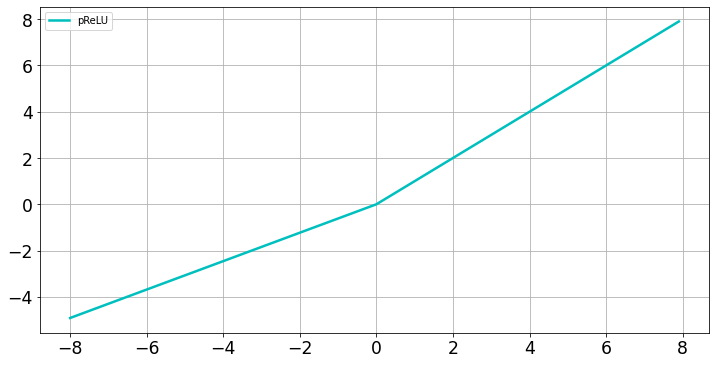

In [24]:
x = torch.arange(-8, 8, 0.1, requires_grad=True)
weight = torch.randn(1)
y = torch.prelu(x, weight)

plt.plot(x.detach(), y.detach(), 'c', label='pReLU')
plt.legend()
plt.grid();

In [25]:
print(weight)

tensor([0.6142])


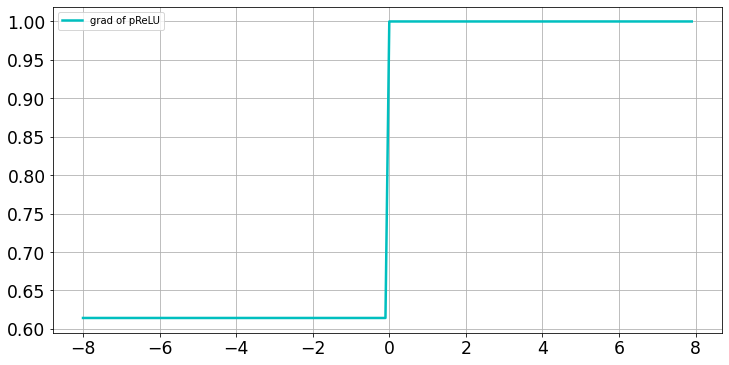

In [26]:
y.backward(torch.ones_like(x), retain_graph=True)

plt.plot(x.detach(), x.grad, 'c', label = "grad of pReLU")
plt.legend()
plt.grid();

### Q3:

In [27]:
def swish_activation(x, beta):

  return x * torch.sigmoid(beta * x)

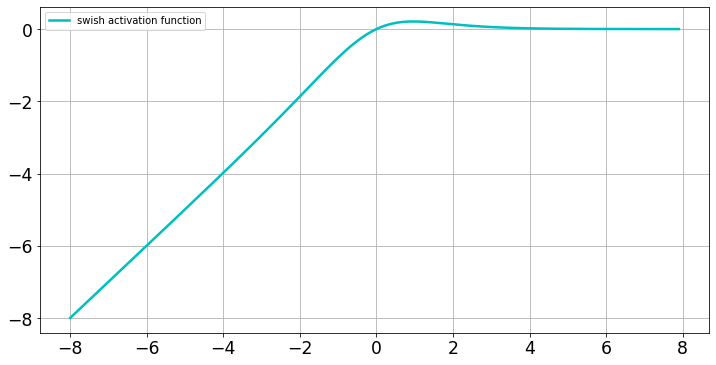

In [28]:
beta = torch.randn(1)
y = swish_activation(x, beta)

plt.plot(x.detach(), y.detach(), 'c', label = "swish activation function")
plt.legend()
plt.grid();

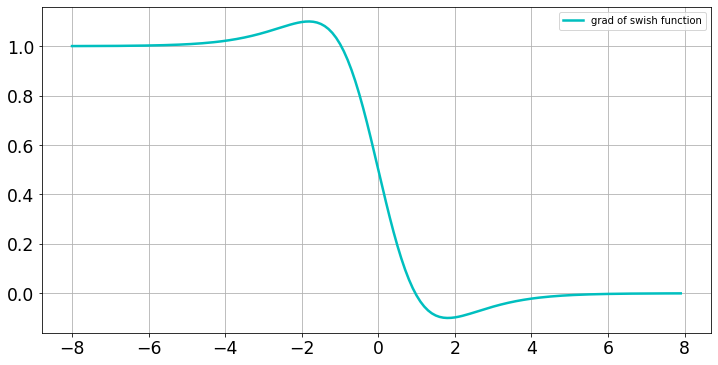

In [29]:
x.grad.zero_()
y.backward(torch.ones_like(x), retain_graph=True)

plt.plot(x.detach(), x.grad, 'c', label = 'grad of swish function')
plt.legend()
plt.grid();

### Q7:

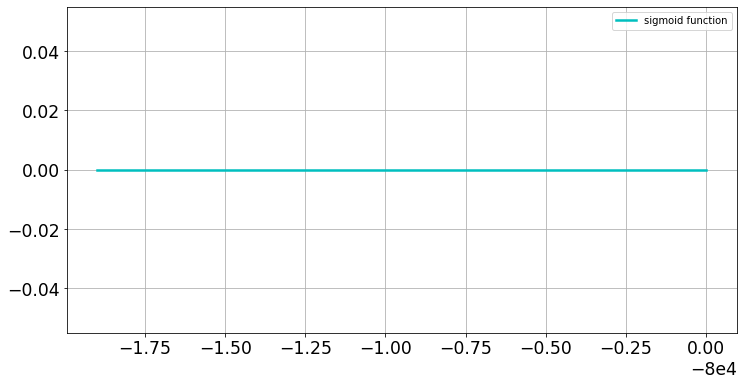

In [8]:
x = torch.arange(-80000, -80002, -0.1, dtype=torch.float32, requires_grad=True)
y = torch.sigmoid(x)

plt.plot(x.detach(), y.detach(), 'c', label = "sigmoid function")
plt.legend()
plt.grid();